In [36]:
%matplotlib notebook

import os,sys

# Here are commands to install a package (OpenVisus) directly from a jupyter notebook
# after you install those once you can comment those comment
#!{sys.executable} -m pip install itkwidgets
#!{sys.executable} -m pip install OpenVisus
#!{sys.executable} -m OpenVisus configure

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

import OpenVisus as ov

# Enable I/O component of OpenVisus
ov.DbModule.attach()

In [37]:
def showData(data, cmap=None, plot=None):
    if len(data.shape)==3 and data.shape[0]==1: data=data[0,:,:]
    if len(data.shape)==3 and data.shape[1]==1: data=data[:,0,:]   
    if len(data.shape)==3 and data.shape[2]==1: data=data[:,:,0]
    if(plot==None or cmap!=None):
        fig=plt.figure(figsize = (7,5))
        plot = plt.imshow(data, origin='lower', cmap=cmap)
        plt.show()
        return plot
    else:
        plot.set_data(data)
        plt.show()
        return plot

In [38]:
dataset=ov.LoadDataset("https://atlantis.sci.utah.edu/mod_visus?dataset=BlueMarble")

<IPython.core.display.Javascript object>


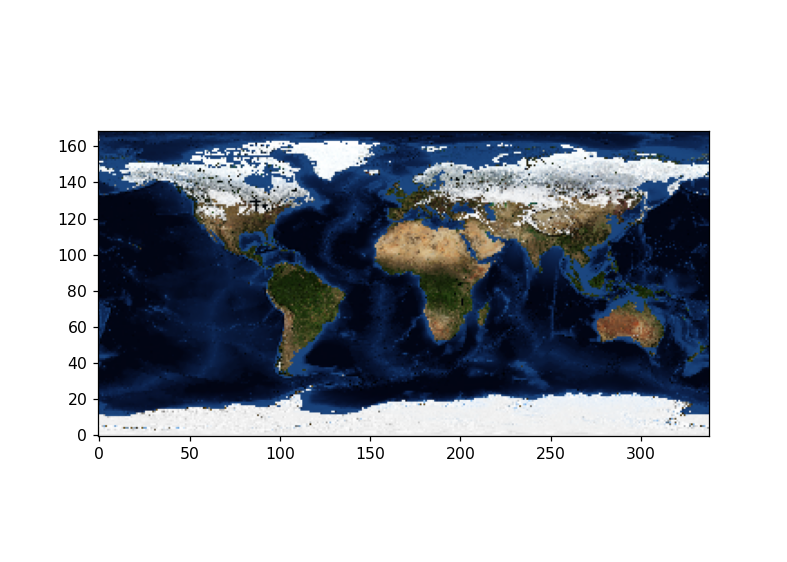

In [39]:
showData(dataset.read(time=0, max_resolution=17))

<IPython.core.display.Javascript object>


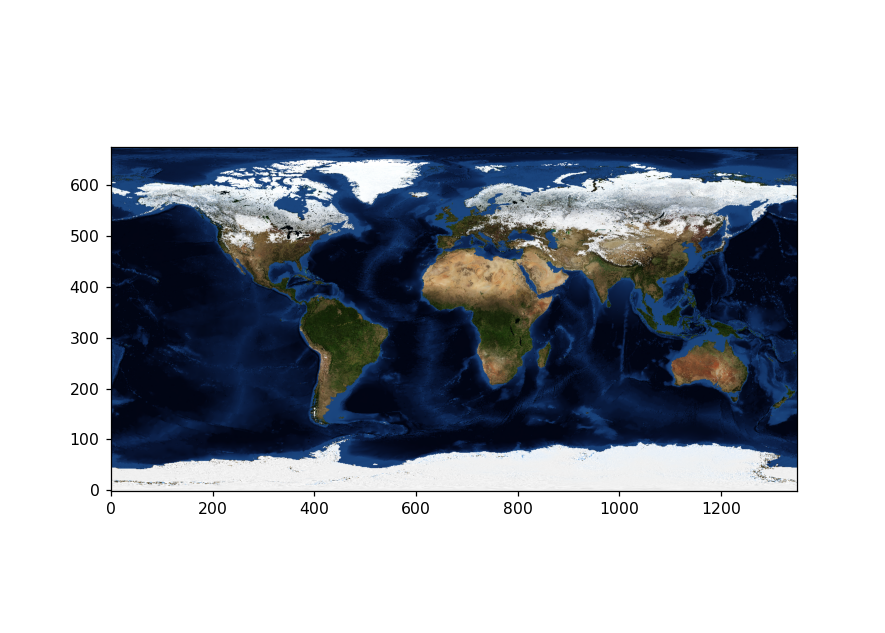

interactive(children=(IntSlider(value=9, description='resolution', max=21, min=5, step=4), Output()), _dom_cla…

<function __main__.<lambda>(resolution)>

In [40]:
myplot = showData(dataset.read(time=0, max_resolution=21))

interact(
    lambda resolution: showData(dataset.read(max_resolution=resolution), plot=myplot),
    resolution=widgets.IntSlider(value=9,min=5,max=21,step=4))

<IPython.core.display.Javascript object>


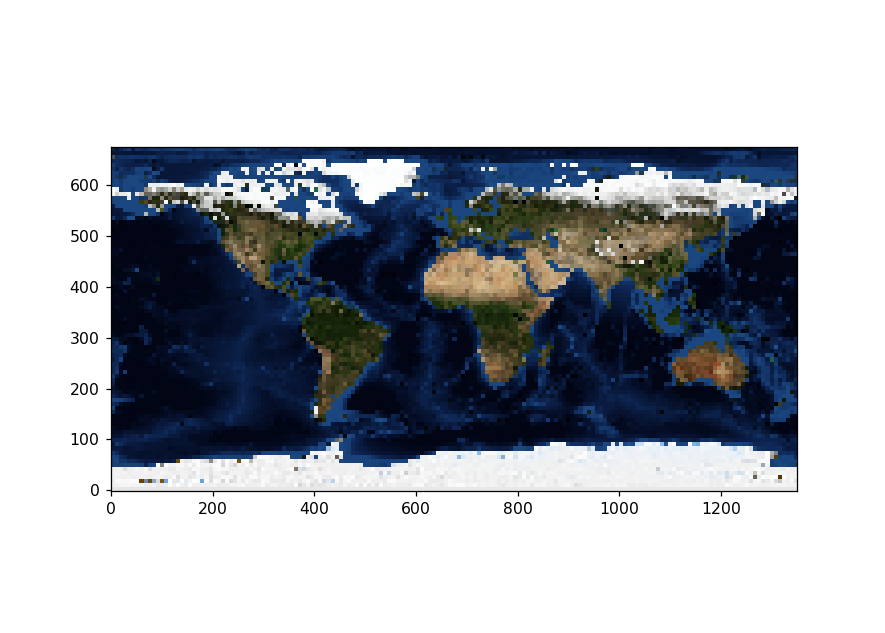

interactive(children=(IntSlider(value=0, description='time', max=11), IntSlider(value=9, description='resoluti…

<function __main__.<lambda>(time, resolution)>

In [41]:
myplot = showData(dataset.read(time=0, max_resolution=21))

# reuse the plot with an interact for varying time and resolution values
interact(
    lambda time,resolution: showData(dataset.read(time=time,max_resolution=resolution), plot=myplot),
    time=widgets.IntSlider(value=0,min=0,max=11,step=1), 
    resolution=widgets.IntSlider(value=9,min=5,max=dataset.getMaxResolution(),step=2))

In [7]:
data = dataset.read(time=0, max_resolution=21)
data.shape

(675, 1350, 3)

In [42]:
def threshold(data, t):
    return data > t

In [43]:
def grey(data):
    R,G,B=(0.2989*data[:,:,0], 0.5870*data[:,:,1], 0.1140*data[:,:,2])
    grey_data=R+G+B
    return grey_data

<IPython.core.display.Javascript object>


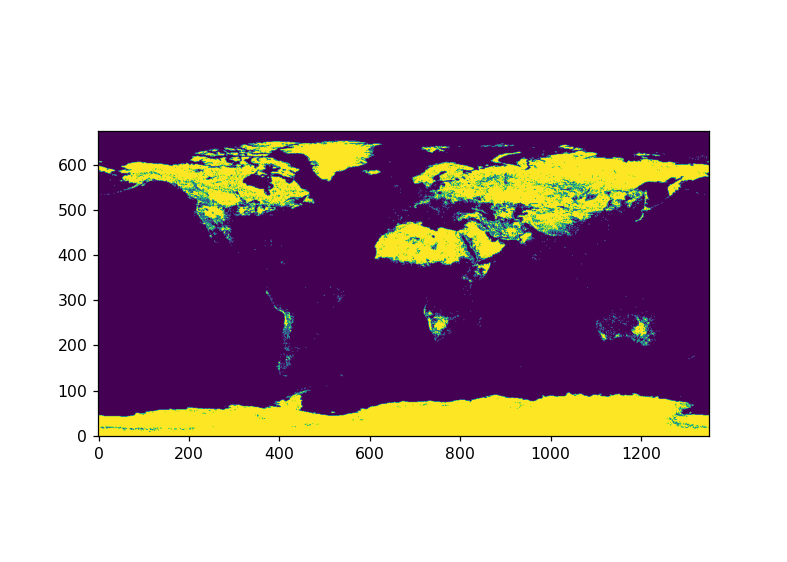

interactive(children=(IntSlider(value=0, description='time', max=11), IntSlider(value=9, description='resoluti…

<function __main__.<lambda>(time, resolution, thr)>

In [44]:
myplot = showData(threshold(dataset.read(time=0, max_resolution=21), t=150))


# reuse the plot with an interact for varying time and resolution values
interact(
    lambda time,resolution,thr: showData(threshold(grey(dataset.read(time=time,max_resolution=resolution)), t=thr), plot=myplot),
    time=widgets.IntSlider(value=0,min=0,max=11,step=1), 
    resolution=widgets.IntSlider(value=9,min=5,max=dataset.getMaxResolution(),step=2),
    thr=widgets.IntSlider(value=100,min=0,max=250,step=1))


<IPython.core.display.Javascript object>


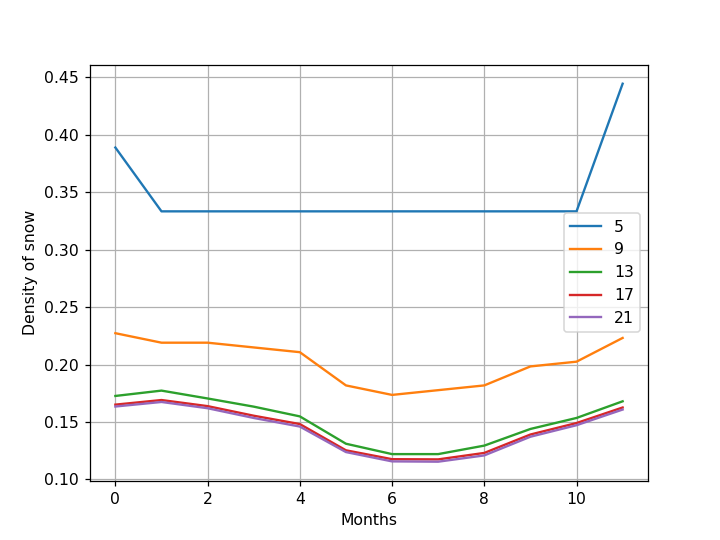

In [11]:
def density_snow(dataset,res,thr):
    densities = []
    for time in range(12):
        dt = dataset.read(time=time, max_resolution=res)
        R,G,B=(0.2989*dt[:,:,0], 0.5870*dt[:,:,1], 0.1140*dt[:,:,2])
        dt=R+G+B
        count = (dt>thr).sum()
        x,y = dt.shape
        total = x*y
        densities.append(count/total)
    return densities

def snow_density_plot():
    resolutions = [5,9,13,17,21] 
    times = [0,1,2,3,4,5,6,7,8,9,10,11]
    plt.figure()
    for res in resolutions:
        plt.plot(times,density_snow(dataset,res,210))
    plt.grid()
    plt.legend(resolutions)
    plt.xlabel("Months")
    plt.ylabel("Density of snow")
    
snow_density_plot()

<IPython.core.display.Javascript object>


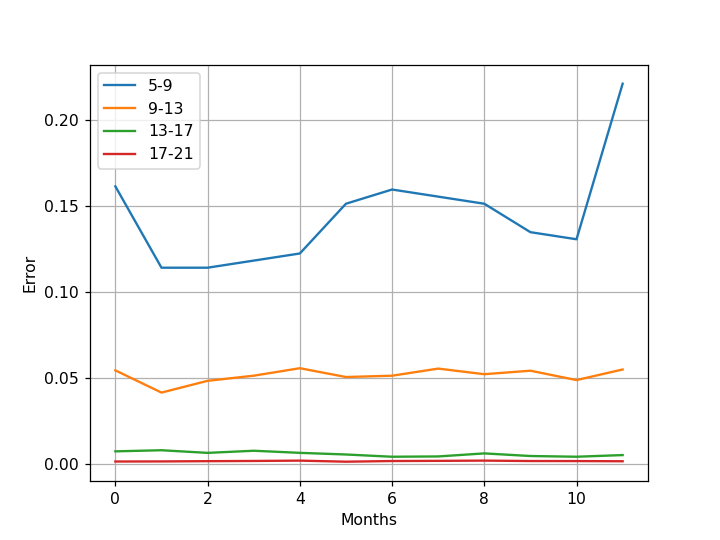

13-17 is less than 0.002 and std is 0.001310487734839918
17-21 is less than 0.002 and std is 0.0001843712523129319

Resolution 13 has a standard deviation of less than 0.002
Resolution 17 has a standard deviation of less than 0.002
Resolution 21 has a standard deviation of less than 0.002


In [12]:
def calcError(arr1,arr2):
    err = []
    for i,ele in enumerate(arr1):
        err_e = (ele-arr2[i])
        err.append(err_e)
    return err

def findStdv():
    times = [0,1,2,3,4,5,6,7,8,9,10,11]
    resolutions = [5,9,13,17,21] 
    lengend = []
    ans = set()
    plt.figure()
    for i in range(1,len(resolutions)):
        err = calcError(density_snow(dataset,resolutions[i-1],210),density_snow(dataset,resolutions[i],210))
        plt.plot(err)
        lengend.append(str(resolutions[i-1])+"-"+str(resolutions[i]))
        std = np.std(err)
        if std<0.002:
            print("{0}-{1} is less than 0.002 and std is {2}".format(str(resolutions[i-1]),str(resolutions[i]),std))
            ans.add(resolutions[i-1])
            ans.add(resolutions[i])
    plt.grid()
    plt.legend(lengend)
    plt.xlabel("Months")
    plt.ylabel("Error")
    return ans
AnsSet = findStdv()
AnsArr = sorted(list(AnsSet))

print("")
for ele in AnsArr:
    print("Resolution {} has a standard deviation of less than 0.002".format(ele))

In [13]:
def density_Winter_NH(dataset,res,thr):
    densities = []
    times = [11,0,1,2]
    for time in times:
        dt = dataset.read(time=time, max_resolution=res)
        R,G,B=(0.2989*dt[:,:,0], 0.5870*dt[:,:,1], 0.1140*dt[:,:,2])
        dt=R+G+B
        y,x = dt.shape
        NH = dt[y//2:,:]
        count = (NH>thr).sum()
        total = x*(y//2)
        densities.append(count/total)
    return densities


def findRange(dataset):
    from collections import defaultdict
    span = defaultdict(int)
    for res in AnsArr:
        total,count = 0,0
        for thr in range(194,280):
            densities = np.array(density_Winter_NH(dataset,res,thr))
            if all(densities==0) and all(densities<0.05):
                break
            if all(0.05<=densities) and all(densities<=0.15):
                total+=thr
                count+=1
        span[res] = total/count
    return span
            
totalRange = findRange(dataset)
print(totalRange)

defaultdict(<class 'int'>, {13: 225.0, 17: 218.5, 21: 218.0})


In [14]:
def density_Inter(dataset,res,part=None,thr=None):
    thr = totalRange[res]
    dens = []
    for time in range(12):
        dt = dataset.read(time=time, max_resolution=res)
        R,G,B=(0.2989*dt[:,:,0], 0.5870*dt[:,:,1], 0.1140*dt[:,:,2])
        dt=R+G+B
        y,x = dt.shape
        count = (dt>thr).sum()
        y,x = dt.shape
        total = y*x
        dens.append(count/total)
    Max,Min = max(dens),min(dens)
    print("Lowest month is {}".format(dens.index(Min)+1))
    print("Largest month is {}".format(dens.index(Max)+1))
    fig = plt.figure(figsize = (7,5))
    plot = plt.plot(dens)
    plt.xlabel("time")
    plt.ylabel("Snow density")
    plt.title("Resolution {0} at average threshold {1}".format(res,thr))
    plt.grid()
    plt.show()
    
interact(
    lambda res: density_Inter(dataset,res=res),
    res=widgets.IntSlider(value=13,min=13,max=21,step=4))

interactive(children=(IntSlider(value=13, description='res', max=21, min=13, step=4), Output()), _dom_classes=…

<function __main__.<lambda>(res)>

<IPython.core.display.Javascript object>


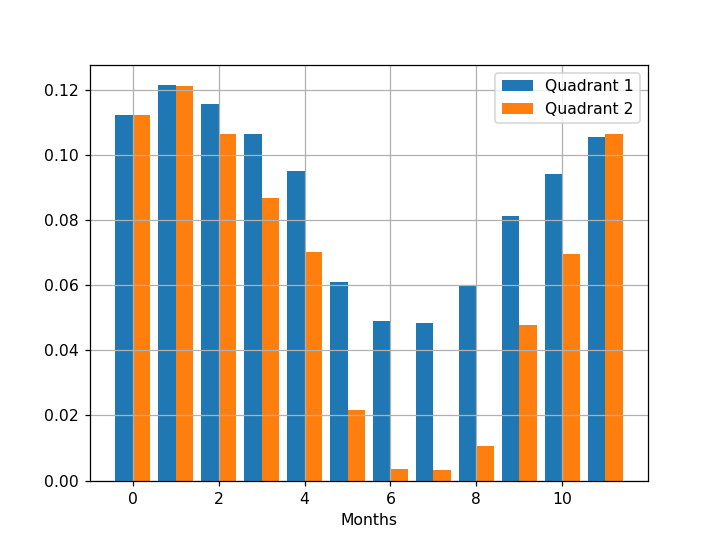

Text(0.5, 0, 'Months')

In [15]:
def density_snow(dataset,res,thr,part):
    dens = []
    for time in range(12):
        data = dataset.read(time=time, max_resolution=res)
        y,x,z = data.shape
        R,G,B=(0.2989*data[:,:,0], 0.5870*data[:,:,1], 0.1140*data[:,:,2])
        data=R+G+B
        if part==1:
            data = data[y//2:,:x//2]
        if part==2:
            data = data[y//2:,x//2:]
        count = (data>thr).sum()
        y,x = data.shape
        total = y*x
        dens.append(count/total)
    return dens

d1 = density_snow(dataset,21,totalRange[21],1)
d2 = density_snow(dataset,21,totalRange[21],2)

plt.figure()
times = [0,1,2,3,4,5,6,7,8,9,10,11]
legend = ['Quadrant 1', 'Quadrant 2']
X_axis = np.arange(len(times))
plt.bar(X_axis - 0.2, d1, 0.4, label = 'Quadrant 1')
plt.bar(X_axis + 0.2, d2, 0.4, label = 'Quadrant 2')
plt.legend(legend)
plt.grid()
plt.xlabel("Months")

Question 1: This is a three dimensional dataset, because we x, y, and time all inculded in the data.

Question 2: For the embedding dimension of visualizations 3 and 4 they should both be two dimensional. 

In [16]:
resolutions = [5,9,13,17,21]
for res in resolutions:
    dt = dataset.read(time=9, max_resolution=res)
    print("At resolution {0} memory usage is {1}".format(res,dt.nbytes))

At resolution 5 memory usage is 54
At resolution 9 memory usage is 726
At resolution 13 memory usage is 10965
At resolution 17 memory usage is 171366
At resolution 21 memory usage is 2733750


Question 3:

At resolution 5 memory usage is 54
At resolution 9 memory usage is 726
At resolution 13 memory usage is 10965
At resolution 17 memory usage is 171366
At resolution 21 memory usage is 2733750

Question 4: I could start identifing contient boundaries at around resolutions 13. To mean this is important because this is baiscally minimum resolution that visualizations start to be useful, and now that I know the memory usage at different resolutions I can make a better decision about which resolution would be the best balance between being high resolution, but not too data intensive. 

In [17]:
from collections import defaultdict
sizes = defaultdict(int)
for res in resolutions:
    cur = 0
    for time in range(12):
        dt = dataset.read(time=time, max_resolution=res)
        sizes[res] += dt.nbytes
        
for res in sizes:
    print("At resolution {0} memory usage is {1}".format(res,sizes[res]))

At resolution 5 memory usage is 648
At resolution 9 memory usage is 8712
At resolution 13 memory usage is 131580
At resolution 17 memory usage is 2056392
At resolution 21 memory usage is 32805000


Question 5: 

At resolution 5 memory usage is 648
At resolution 9 memory usage is 8712
At resolution 13 memory usage is 131580
At resolution 17 memory usage is 2056392
At resolution 21 memory usage is 32805000

In [18]:
import itk
from itkwidgets import view
import itkwidgets
import time
from collections import defaultdict

In [19]:
dataset=ov.LoadDataset("https://atlantis.sci.utah.edu/mod_visus?dataset=borg")
data = dataset.read(time=15, max_resolution=24)
y,x,z = data.shape
data.tofile("Q2Part1Data.raw")

In [20]:
def interactiveHelper(t,res):
    dt = dataset.read(time=t,  max_resolution=res)
    viewer.image = data
    
dt = dataset.read(time=7, max_resolution=24)
viewer = view(dt)
slider = interactive(interactiveHelper, t = [x for x in range(16)], res = [x for x in range(15,26,3)])
widgets.VBox([viewer, slider])

<IPython.core.display.Javascript object>


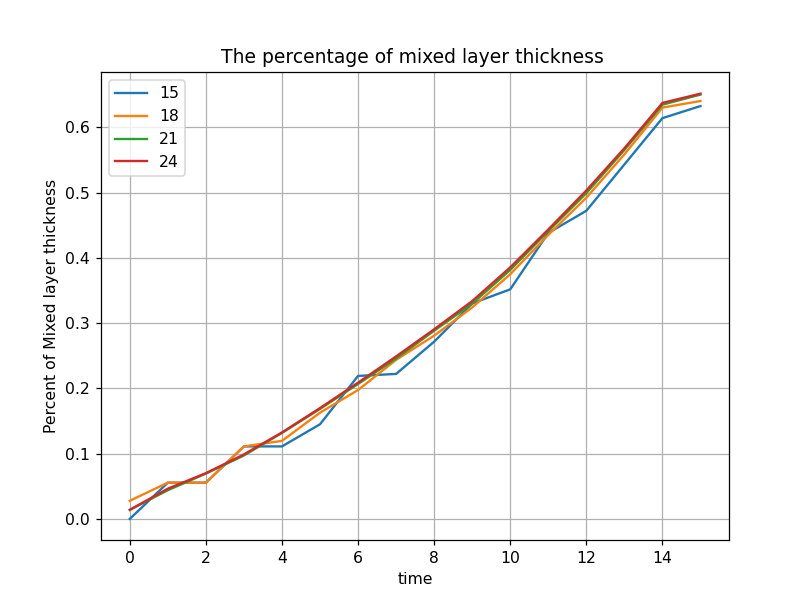

In [28]:
t0 = time.process_time_ns() 
class PercentMixedP3:
    def __init__(self,res):
        self.res = res
    
    def PercentMZ(self,t):
        data = dataset.read(time=t, max_resolution=self.res)
        x,y,z = data.shape
        total = 0
        for i in range(z):
            z_slice = data[:,:,i]
            x,y = z_slice.shape
            cnt = 0
            for j in range(x):
                check = 0
                row = list(z_slice[j])
                check+= row.count(0)+row.count(255)
                if y!=check:
                    cnt+=1
            total+=cnt
        avg = total/z
        return avg/x

dataV = defaultdict(list)
for res in [15,18,21,24]:
    p = PercentMixedP3(res)
    for t in [x for x in range(16)]:
        dataV[res].append(p.PercentMZ(t))
t1 = time.process_time_ns() 

plt.figure()
for res in dataV:
    plt.plot([x for x in range(16)],dataV[res])

plt.title('The percentage of mixed layer thickness ')
plt.xlabel('time')
plt.ylabel('Percent of Mixed layer thickness')
plt.grid()
plt.legend(['15','18','21','24'])

Coding Part 3 Explaination: At lower resolutions the graph jumps from point to point while higher resolutions show a much smoother trend. This is probably due to higher resolutions having better information about any point containing mixed liquid. 

<IPython.core.display.Javascript object>


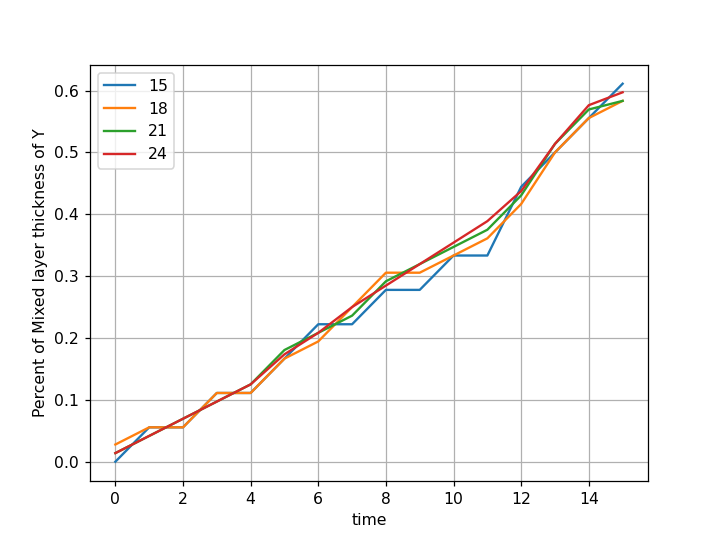

In [29]:
ts0 = time.process_time_ns()
class PercentMixedP4:
    def __init__(self,res):
        self.res = res
    
    def PercentX(self,t):
        data = dataset.read(time=t, max_resolution=self.res)
        x,y,z = data.shape
        sliceX = data[x//2,:,:]
        x,y = sliceX.shape
        cnt = 0
        for j in range(x):
            check = 0
            row = list(sliceX[j])
            check+= row.count(0)+row.count(255)
            if y!=check:
                cnt+=1
        return cnt/x
    
    def PercentY(self,t):
        data = dataset.read(time=t, max_resolution=self.res)
        x,y,z = data.shape
        sliceY = data[:,y//2,:]
        x,y = sliceY.shape
        cnt = 0
        for j in range(y):
            check = 0
            row = list(sliceY[j])
            check+= row.count(0)+row.count(255)
            if y!=check:
                cnt+=1
        return cnt/x
    
dataY,dataX = defaultdict(list),defaultdict(list)
for res in [15,18,21,24]:
    p = PercentMixedP4(res)
    for t in [x for x in range(16)]:
        dataY[res].append(p.PercentY(t))
        dataX[res].append(p.PercentX(t))
ts1 = time.process_time_ns()

plt.figure()
for res in dataY:
    plt.plot([x for x in range(16)],dataY[res])
    
plt.xlabel('time')
plt.ylabel('Percent of Mixed layer thickness of Y')
plt.grid()
plt.legend(['15','18','21','24'])

In [30]:
#Image of Y
x,y,z = data.shape
sliceY = data[:,y//2,:]
view(sliceY)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC2; pr…

<IPython.core.display.Javascript object>


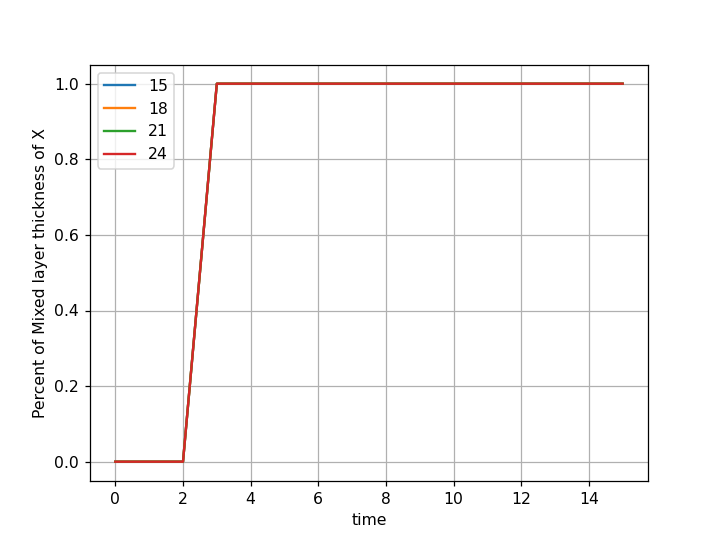

In [31]:
plt.figure()
for res in dataX:
    plt.plot([x for x in range(16)],dataX[res])
    
plt.xlabel('time')
plt.ylabel('Percent of Mixed layer thickness of X')
plt.grid()
plt.legend(['15','18','21','24'])

In [32]:
#Image of X
x,y,z = data.shape
sliceX = data[x//2,:,:]
view(sliceX)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC2; pr…

Coding Part 4 Explaination: For the x-orthogonal plane the graph seems pretty inconsistant with the data from problem three. It starts at 0 and then jumps up to 1 and stays there for the rest of the time. The y-orthogonal plane data however, shows similar results to the graph from problem 3 but with slightly greater variation with the resolutions.

<IPython.core.display.Javascript object>


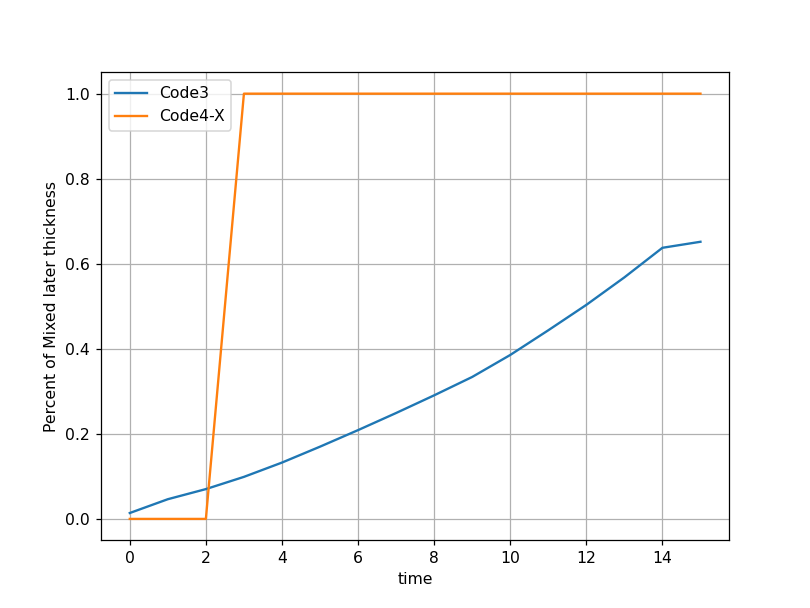

In [33]:
res = 24

tz0 = time.process_time_ns()
Z24 = []
pZ = PercentMixedP3(res)
for t in [x for x in range(16)]:
    Z24.append(pZ.PercentMZ(t))
tz1 = time.process_time_ns()

p = PercentMixedP4(res)
tx0 = time.process_time_ns()
X24 = []
for t in [x for x in range(16)]:
    X24.append(p.PercentX(t))
tx1 = time.process_time_ns()

Y24 = []
ty0 = time.process_time_ns()
for t in [x for x in range(16)]:
    Y24.append(p.PercentY(t))
ty1 = time.process_time_ns()
plt.figure()
plt.plot([x for x in range(16)],Z24)
plt.plot([x for x in range(16)],X24)
plt.xlabel('time')
plt.ylabel('Percent of Mixed later thickness')
plt.grid()
plt.legend(['Code3','Code4-X'])

<IPython.core.display.Javascript object>


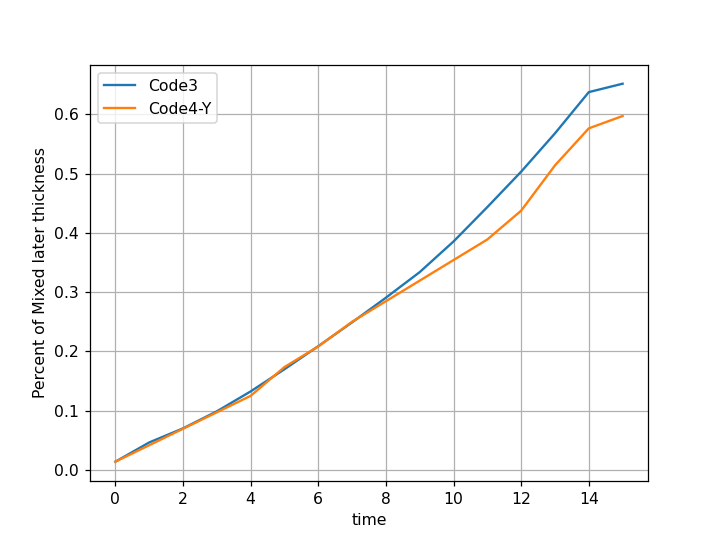

In [34]:
plt.figure()
plt.plot([x for x in range(16)],Z24)
plt.plot([x for x in range(16)],Y24)
plt.xlabel('time')
plt.ylabel('Percent of Mixed later thickness')
plt.grid()
plt.legend(['Code3','Code4-Y'])

In [35]:
print("Computing time for code3 is {} sec".format(tz1-tz0))
print("Computing time for code4-X is {} sec".format(tx1-tx0))
print("Computing time for code4-Y is {} sec".format(ty1-ty0))

Computing time for code3 is 182828125000 sec
Computing time for code4-X is 8906250000 sec
Computing time for code4-Y is 9312500000 sec


Coding Problem 5 Explaination: When the graph from problem 3 is compared to the x graph from problem 4, you can clearly see that they are drastically different. When the y graph is compared to the graph from problem 3 it stays pretty consistant until it reaches timestep 8 where the y graph estimate becomes less than the estimate from graph 3. The times for each are listed above. Graph 3 takes the most time and shows pretty consistant results, but the y graph takes about half the time and still seems to be pretty accurate. The x graph doesn't seem useful unless there is something I'm missing.   

Coding and Paraview Problem 7 Explaination: For this problem I needed to combine the layers through a specfic axis to get the desired shape. Since it is possible to display the mixed layer thickness in this manner, it could be used to display the diffusion rate of the two liquids. 